## Analisis de Opiniones sobre Peliculas

## a) 
Construya un dataframe con los datos a analizar descargando los datos desde la URL local [5]. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [39]:
import urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")

rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
train_df.shape
test_df.shape

(3554, 2)

In [40]:
print "El conjunto de entrenamiento contiene {0} filas y {1} columnas".format(train_df.shape[0], train_df.shape[1])
print "Informacion sobre el conjunto de entrenamiento:\n"
train_df.info()
print train_df

print "\n El conjunto de prueba contiene {0} filas y {1} columnas".format(test_df.shape[0], test_df.shape[1])
print "Informacion sobre el conjunto de pruebas:\n"
test_df.info()

spl = [3550, 2684, 3488, 2330, 1526]
print train_df.iloc[spl]


El conjunto de entrenamiento contiene 3554 filas y 2 columnas
Informacion sobre el conjunto de entrenamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 2 columns):
Sentiment    3554 non-null int64
Text         3554 non-null object
dtypes: int64(1), object(1)
memory usage: 55.6+ KB
      Sentiment                                               Text
0            -1  everything's serious , poetic , earnest and --...
1            -1  narratively , trouble every day is a plodding ...
2             1  a truly wonderful tale combined with stunning ...
3             1  jason patric and ray liotta make for one splen...
4            -1  haneke keeps us at arm's length . guided more ...
5            -1  richard pryor mined his personal horrors and c...
6            -1  puts on airs of a hal hartley wannabe film -- ...
7            -1  the characters are interesting and the relatio...
8            -1  this long and relentlessly saccharine film is

## b)
Construya una función, denominada word extractor, que devuelva una lista de las palabras contenidas en
un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming.
Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con
los resultados obtenidos si no se hace stemming.

In [41]:
import re, time
from nltk.corpus import stopwords
from nltk import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline 

In [42]:
#method: 0 = none, 1= stemming, 2=lemming
#stops: 0=sin filtrar stops, 1= con filtrado

def word_extractor(text, method, stops):
    text = text.lower() # Transformación a minusculas
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1', text) #substitute multiple letter by two

    words = ""
    tokenizer = RegexpTokenizer(r'\w+') # Usamos esta funcion para eliminar las puntuaciones y trabajar correctamente
                                        # con algunas abreviaciones que causaban problemas, por ejemplo
                                        # aren't, 've, don't, etc.
    wordtokens = tokenizer.tokenize(text.decode('utf-8', 'ignore'))
    
    stemmer = SnowballStemmer("english") # Steamer
    wordlemmatizer = WordNetLemmatizer()
    
    for word in wordtokens:
        if stops == 1:
            if word not in commonwords:
                if method == 0:
                    words += word+" "
                elif method == 1:
                    words+= stemmer.stem(word)+" " #
                elif method == 2:
                    words+= wordlemmatizer.lemmatize(word)+" "
        else:
            if method == 0:
                words += word+" "
            elif method == 1:
                words+= stemmer.stem(word)+" " #
            elif method == 2:
                words+= wordlemmatizer.lemmatize(word)+" "
        
    return words[:-1]

print "Steaming + filtro:"
print word_extractor("I love to eat cake", 1, 1)
print word_extractor("I love eating cake",1,1)
print word_extractor("I loved eating the cake",1,1)
print word_extractor("I do not love eating cake",1,1)
print word_extractor("I don't love eating cake",1,1)
print word_extractor("I choose to believe",1,1)

print "\nSteaming + sin filtro:"
print word_extractor("I love to eat cake", 1, 0)
print word_extractor("I love eating cake",1,0)
print word_extractor("I loved eating the cake",1,0)
print word_extractor("I do not love eating cake",1,0)
print word_extractor("I don't love eating cake",1,0)
print word_extractor("I choose to believe",1,0)

print "\nLemming + filtro:"
print word_extractor("I love to eat cake", 2, 1)
print word_extractor("I love eating cake",2,1)
print word_extractor("I loved eating the cake",2,1)
print word_extractor("I do not love eating cake",2,1)
print word_extractor("I don't love eating cake",2,1)
print word_extractor("I choose to believe",2,1)

print "\nLemming + sin filtro:"
print word_extractor("I love to eat cake", 2, 0)
print word_extractor("I love eating cake",2,0)
print word_extractor("I loved eating the cake",2,0)
print word_extractor("I do not love eating cake",2,0)
print word_extractor("I don't love eating cake",2,0)
print word_extractor("I choose to believe",2,0)

Steaming + filtro:
love eat cake
love eat cake
love eat cake
love eat cake
love eat cake
choos believ

Steaming + sin filtro:
i love to eat cake
i love eat cake
i love eat the cake
i do not love eat cake
i don t love eat cake
i choos to believ

Lemming + filtro:
love eat cake
love eating cake
loved eating cake
love eating cake
love eating cake
choose believe

Lemming + sin filtro:
i love to eat cake
i love eating cake
i loved eating the cake
i do not love eating cake
i don t love eating cake
i choose to believe


## c)
Construya una función, denominada word extractor2, análoga a la función anterior, pero que lematice
las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior
y discuta las diferencias que observa.

In [43]:
def word_extractor2(text):
    text = text.lower() # Transformación a minusculas
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    tokenizer = RegexpTokenizer(r'\w+') # Usamos esta funcion para eliminar las puntuaciones y trabajar correctamente
                                        # con algunas abreviaciones que causaban problemas, por ejemplo
                                        # aren't, 've, don't, etc.
    wordtokens = tokenizer.tokenize(text.decode('utf-8', 'ignore'))
    
    for word in wordtokens:
        if word not in commonwords:
            words+=wordlemmatizer.lemmatize(word)+" "
    return words[:-1]

print word_extractor2("I love to eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("believe")

love eat cake
love eating cake
loved eating cake
love eating cake
believe


## d)
Utilizando la función CountVectorizer de la libreria sklearn y de acuerdo a las directrices mencionadas en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

In [44]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
def data(method, stops):
    texts_train = [word_extractor(text, method, stops) for text in train_df.Text]
    texts_test = [word_extractor(text, method, stops) for text in test_df.Text]

    vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
    vectorizer.fit(np.asarray(texts_train))

    features_train = vectorizer.transform(texts_train)
    features_test = vectorizer.transform(texts_test)

    labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
    labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)

    vocab = vectorizer.get_feature_names()
    dist_train=list(np.array(features_train.sum(axis=0)).reshape(-1,))
    dist_test=list(np.array(features_test.sum(axis=0)).reshape(-1,))

    inpu_train = ""
    inpu_test = ""
    for tag, count in zip(vocab, dist_train):
        inpu_train += (tag + " ")*count
    for tag, count in zip(vocab, dist_test):
        inpu_test += (tag + " ")*count
    return features_train, labels_train, features_test, labels_test, inpu_train, inpu_test

![title](vector.png)

![title](rank_stemm.png)

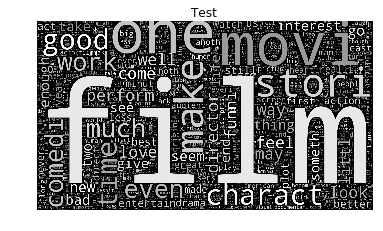

In [47]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

a, b, c, d, inpu_train, inpu_test = data(1, 1)

wc_train = WordCloud(max_words=2000, margin=2,
               random_state=2, width=2048, height=1152).generate(inpu_train)
wc_test = WordCloud(max_words=2000, margin=2,
               random_state=2, width=2048, height=1152).generate(inpu_test)


plt.title("Train")
plt.imshow(wc_train.recolor(color_func=grey_color_func, random_state=3))

wc_train.to_file("cloud_train.png")

plt.title("Test")
plt.imshow(wc_test.recolor(color_func=grey_color_func, random_state=3))

wc_test.to_file("cloud_test.png")
plt.axis("off")
plt.figure()
plt.show()

In [58]:
#d = {'vocab': vocab, 'count':dist_train}
#d_train = pd.DataFrame(data=d)
#print d_train.sort_values('count', ascending=False)

In [59]:
#d = {'vocab': vocab, 'count':dist_test}
#d_train = pd.DataFrame(data=d)
#print d_train.sort_values('count', ascending=False)

![title](rank.png)

## e)
 Construya una función que evalúe el desempeno obtenido por un clasificador generico en el conjunto
de entrenamiento y en el conjunto de pruebas. Utilice y explique las metricas que calcula la función
classification report de la librer´ıa sklearn.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# x,y = features / labels train
# xt, yt = features / labels test
# text = title

def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Confusion matrix: \n", (confusion_matrix(yt, model.predict(xt)))
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

##  Binary classification

$$precision = \frac{tp}{tp+fp}$$
$$recall = \frac{tp}{tp+fn}$$
$$F_1 = 2*\frac{precision*recall}{precision+recall}$$

## f)
Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las caracteristicas no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las caracteristicas extraidas en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento  tipico. Determine además, que representación obtiene un mejor resultado: si aquella obtenida v´ıa lematización o aquella obtenida via stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, asi como las probabilidades que el clasificador asigna a cada clase).

In [105]:
from sklearn.naive_bayes import BernoulliNB

def do_NAIVE_BAYES(x,y,xt,yt, ver):
    model = BernoulliNB()
    model = model.fit(x, y)
    if ver == 1:
        score_the_model(model,x,y,xt,yt,"BernoulliNB")
        return model
    else:   
        return model.score(x,y), model.score(xt[:-1],yt[:-1])  

In [130]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)

model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)
spl = [3050, 2814, 488, 230, 526]
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)

model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)

model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    

Training Accuracy BernoulliNB: 0.962296
Test Accuracy BernoulliNB: 0.742190
Confusion matrix: 
[[1336  467]
 [ 449 1302]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.74      0.74      1803
          -       0.74      0.74      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.00281437  0.99718563] 1 one of the best of a growing strain of daring films . . . that argue that any sexual relationship that doesn't hurt anyone and works for its participants is a relationship that is worthy of our respect .

[ 0.05608753  0.94391247] -1 yes , i suppose it's lovely that cal works out his issues with his dad and comes to terms with his picture-perfect life -- but world traveler gave me no reason to care , so i didn't .

[ 0.36496972  0.63503028] 1 both an admirable reconstruction of terrible events , and a fitting memorial to the dead of that day , and of the thousands thereafter .

[ 0.73681284

In [131]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
# Usando Stemming
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)

for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
# Usando Stemming
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
# Usando Stemming
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test,1)

test_pred = model.predict_proba(features_test)
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text

Training Accuracy BernoulliNB: 0.963421
Test Accuracy BernoulliNB: 0.757388
Confusion matrix: 
[[1350  453]
 [ 409 1342]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.77      0.75      0.76      1803
          -       0.75      0.77      0.76      1751

avg / total       0.76      0.76      0.76      3554

[ 0.00107952  0.99892048] 1 one of the best of a growing strain of daring films . . . that argue that any sexual relationship that doesn't hurt anyone and works for its participants is a relationship that is worthy of our respect .

[ 0.3739341  0.6260659] -1 yes , i suppose it's lovely that cal works out his issues with his dad and comes to terms with his picture-perfect life -- but world traveler gave me no reason to care , so i didn't .

[ 0.11103364  0.88896636] 1 both an admirable reconstruction of terrible events , and a fitting memorial to the dead of that day , and of the thousands thereafter .

[ 0.63065267  

![title](bernulli.png)

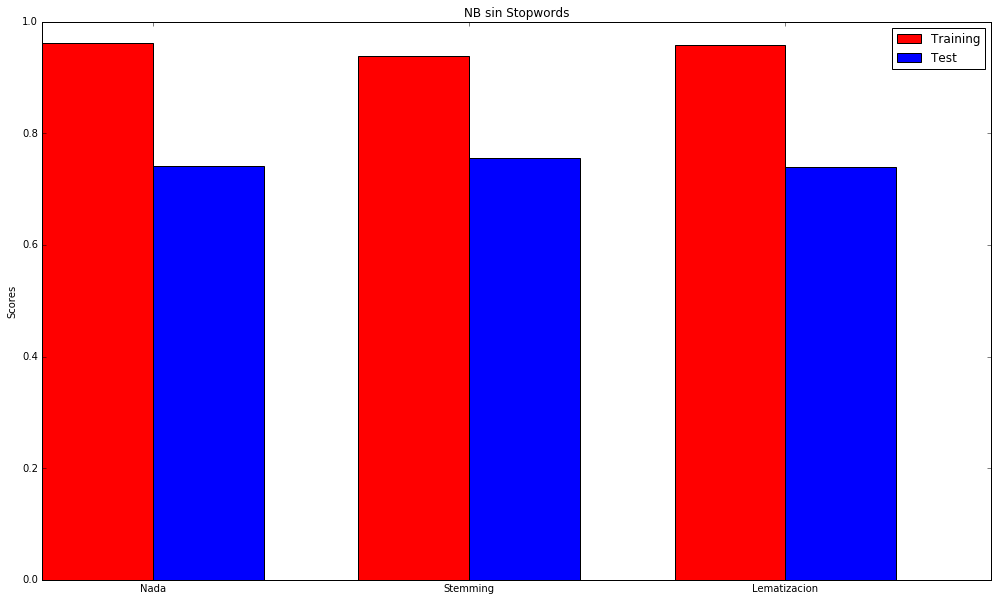

In [175]:
tr_acc = [1,1,1]
ts_acc = [1,1,1]

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
tr_acc[0], ts_acc[0] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
tr_acc[1], ts_acc[1] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
tr_acc[2], ts_acc[2] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)


ind = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(17,10))
rects1 = ax.bar(ind, tr_acc, width, color='r')

rects2 = ax.bar(ind + width, ts_acc, width, color='b')

ax.set_ylabel('Scores')
ax.set_title('NB sin Stopwords')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Nada', 'Stemming', 'Lematizacion'))

ax.legend((rects1[0], rects2[0]), ('Training', 'Test'))
plt.show()

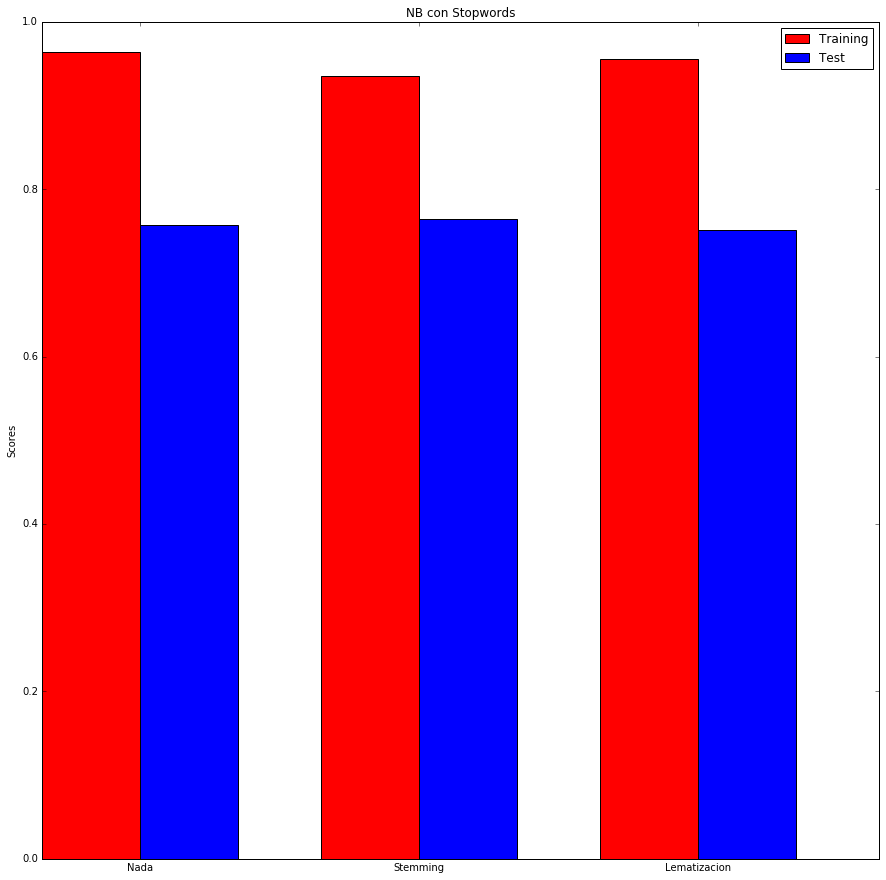

In [176]:
tr_acc = [1,1,1]
ts_acc = [1,1,1]

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
tr_acc[0], ts_acc[0] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
tr_acc[1], ts_acc[1] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
tr_acc[2], ts_acc[2] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)

ind = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.bar(ind, tr_acc, width, color='r')

rects2 = ax.bar(ind + width, ts_acc, width, color='b')

ax.set_ylabel('Scores')
ax.set_title('NB con Stopwords')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Nada', 'Stemming', 'Lematizacion'))

ax.legend((rects1[0], rects2[0]), ('Training', 'Test'))
plt.show()

![title](NB_si_stop.png)

![title](NB_no_stop.png)

## g)
Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo Multinomial (las carac-
ter´ısticas enteras no nulas no serán reducidas a 1) y mida el error de predicción obtenido sobre los
datos de entrenamiento y pruebas. Utilice esta función con las caracter´ısticas extra´ıdas en el punto
(d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento t´ıpico. Determine
además, qu´ e representación obtiene un mejor resultado: si aquella obtenida v´ıa lematización o aquella
obtenida v´ıa stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice
las predicciones del modelo (explore las predicciones, as´ı como las probabilidades que el clasificador
asigna a cada clase).

In [114]:
from sklearn.naive_bayes import MultinomialNB
def do_MULTINOMIAL(x,y,xt,yt,ver):
    model = MultinomialNB()
    model = model.fit(x, y)
    if ver == 1:
        score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
        return model
    else:
        return model.score(x,y), model.score(xt[:-1],yt[:-1]) 

In [117]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
# Usando Stemming
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text


features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
# Usando Stemming
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)

for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
# Usando Stemming
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)

for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text

Training Accuracy MULTINOMIAL: 0.963703
Test Accuracy MULTINOMIAL: 0.741627
Confusion matrix: 
[[1323  480]
 [ 438 1313]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.12638781  0.87361219] 1 the filmmakers' eye for detail and the high standards of performance convey a strong sense of the girls' environment .

[ 0.55385372  0.44614628] 1 the closest thing to the experience of space travel

[ 0.99725527  0.00274473] -1 kids who are into this thornberry stuff will probably be in wedgie heaven . anyone else who may , for whatever reason , be thinking about going to see this movie is hereby given fair warning .

[ 0.26556513  0.73443487] -1 the filmmaker ascends , literally , to the olympus of the art world , but he would have done well to end this flawed , dazzling series with the 

In [118]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data( 0, 0)
# Usando Stemming
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 1)

test_pred = model.predict_proba(features_test)
for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data( 1, 0)
# Usando Stemming
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test,1)

test_pred = model.predict_proba(features_test)

for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data( 2, 0)
# Usando Stemming
model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test,1)

test_pred = model.predict_proba(features_test)

for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
    print sentiment, val, text

Training Accuracy MULTINOMIAL: 0.964828
Test Accuracy MULTINOMIAL: 0.757670
Confusion matrix: 
[[1369  434]
 [ 427 1324]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.76      0.76      1803
          -       0.75      0.76      0.75      1751

avg / total       0.76      0.76      0.76      3554

[ 0.08530564  0.91469436] 1 the filmmakers' eye for detail and the high standards of performance convey a strong sense of the girls' environment .

[ 0.53451286  0.46548714] 1 the closest thing to the experience of space travel

[ 0.99705344  0.00294656] -1 kids who are into this thornberry stuff will probably be in wedgie heaven . anyone else who may , for whatever reason , be thinking about going to see this movie is hereby given fair warning .

[ 0.34382212  0.65617788] -1 the filmmaker ascends , literally , to the olympus of the art world , but he would have done well to end this flawed , dazzling series with the 

![title](multi.png)

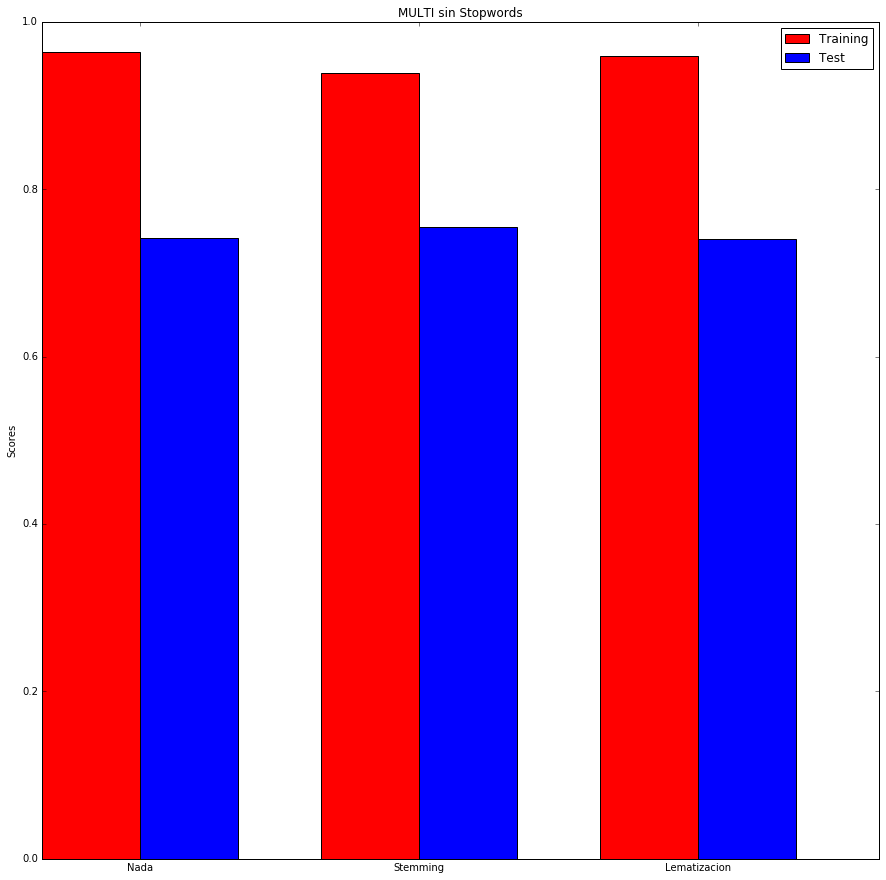

In [178]:
tr_acc = [1,1,1]
ts_acc = [1,1,1]

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
tr_acc[0], ts_acc[0] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
tr_acc[1], ts_acc[1] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
tr_acc[2], ts_acc[2] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)


ind = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.bar(ind, tr_acc, width, color='r')

rects2 = ax.bar(ind + width, ts_acc, width, color='b')

ax.set_ylabel('Scores')
ax.set_title('MULTI sin Stopwords')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Nada', 'Stemming', 'Lematizacion'))

ax.legend((rects1[0], rects2[0]), ('Training', 'Test'))
plt.show()

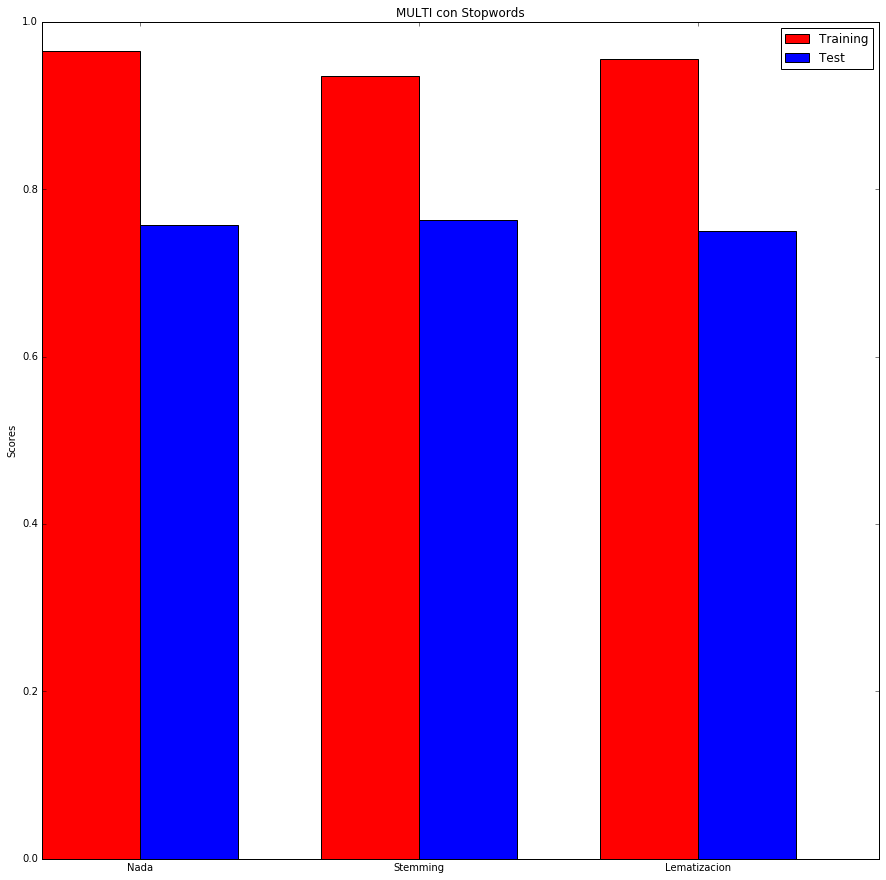

In [179]:
tr_acc = [1,1,1]
ts_acc = [1,1,1]

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
tr_acc[0], ts_acc[0] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
tr_acc[1], ts_acc[1] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)
    
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
tr_acc[2], ts_acc[2] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)


ind = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.bar(ind, tr_acc, width, color='r')

rects2 = ax.bar(ind + width, ts_acc, width, color='b')

ax.set_ylabel('Scores')
ax.set_title('MULTI con Stopwords')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Nada', 'Stemming', 'Lematizacion'))

ax.legend((rects1[0], rects2[0]), ('Training', 'Test'))
plt.show()

![title](multi_no_stop.png)

![title](multi_si_stop.png)

## h)
Construya una función que entrene/ajuste un modelo de Regresión Log´ıstica Regularizado (utilizando,
como penalizador, la norma ‘ 2 ) y mida el error de predicción obtenido sobre los datos de entrenamiento
y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización.
Explique el significado y efecto esperado de este parámetro. Utilice la función construida con los
atributos extra´ıdos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de
pre-procesamiento t´ıpico. Determine además, qu´ e representación obtiene un mejor resultado: si aquella
obtenida v´ıa lematización o aquella obtenida v´ıa stemming. Finalmente, tome un subconjunto aleatorio
de los textos de prueba y analice las predicciones del modelo (explore las predicciones, as´ı como las
probabilidades que el clasificador asigna a cada clase).

In [62]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xt,yt,ver):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    if ver ==1:
        for C in Cs:
            print "Usando C= %f"%C
            model = LogisticRegression(penalty='l2',C=C)
            model = model.fit(x, y)
            score_the_model(model,x,y,xt,yt,"LOGISTIC")
    else:
        tr_acc = []
        ts_acc = []
        
        for C in Cs:
            model = LogisticRegression(penalty='l2',C=C)
            model = model.fit(x, y)
            tr_acc.append(model.score(x,y))
            ts_acc.append(model.score(xt[:-1],yt[:-1]))
            
        return Cs, tr_acc, ts_acc   
        


In [64]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
do_LOGIT(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
do_LOGIT(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
do_LOGIT(features_train,labels_train,features_test,labels_test, 1)

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.793472
Test Accuracy LOGISTIC: 0.683366
Confusion matrix: 
[[1308  495]
 [ 630 1121]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.67      0.73      0.70      1803
          -       0.69      0.64      0.67      1751

avg / total       0.68      0.68      0.68      3554

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.904896
Test Accuracy LOGISTIC: 0.722769
Confusion matrix: 
[[1325  478]
 [ 507 1244]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.73      0.73      1803
          -       0.72      0.71      0.72      1751

avg / total       0.72      0.72      0.72      3554

Usando C= 10.000000
Training Accuracy LOGISTIC: 1.000000
Test Accuracy LOGISTIC: 0.718829
Confusion matrix: 
[[1281  522]
 [ 477 1274]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   suppo

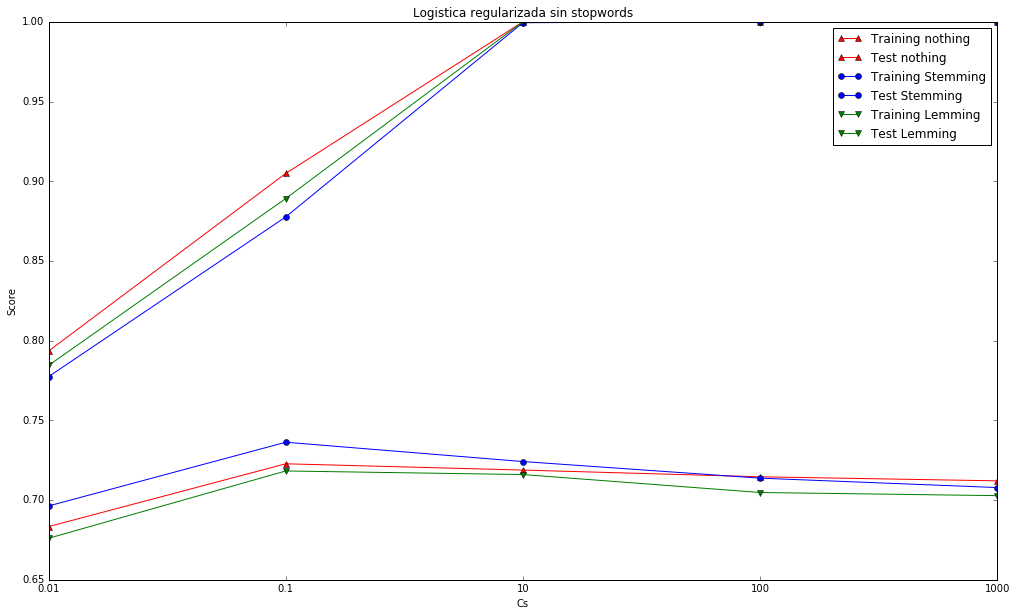

In [94]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
Cs, tr_acc, ts_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)


plt.figure(figsize=(17, 10))
plt.plot(range(0,5), tr_acc, c='r', marker='^', label='Training nothing')
plt.plot(range(0,5), ts_acc, c='r', marker='^', label='Test nothing')

plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
Cs, tr_acc, ts_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='b', marker='o',  label='Training Stemming')
plt.plot(range(0,5), ts_acc, c='b', marker='o', label='Test Stemming')
plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
Cs, tr_acc, ts_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='g', marker='v', label='Training Lemming')
plt.plot(range(0,5), ts_acc, c='g',  marker='v', label='Test Lemming')

plt.xlabel("Cs")
plt.ylabel("Score")
plt.xticks(range(0,5),['0.01','0.1','10','100','1000'])
plt.title("Logistica regularizada sin stopwords")
plt.legend()

In [150]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
do_LOGIT(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
do_LOGIT(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
do_LOGIT(features_train,labels_train,features_test,labels_test, 1)

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.733258
Test Accuracy LOGISTIC: 0.672108
Confusion matrix: 
[[1230  573]
 [ 592 1159]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.68      0.68      1803
          -       0.67      0.66      0.67      1751

avg / total       0.67      0.67      0.67      3554

Usando C= 0.100000
Training Accuracy LOGISTIC: 0.887451
Test Accuracy LOGISTIC: 0.724740
Confusion matrix: 
[[1290  513]
 [ 465 1286]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.74      0.72      0.73      1803
          -       0.71      0.73      0.72      1751

avg / total       0.73      0.72      0.72      3554

Usando C= 10.000000
Training Accuracy LOGISTIC: 1.000000
Test Accuracy LOGISTIC: 0.735998
Confusion matrix: 
[[1297  506]
 [ 432 1319]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   suppo

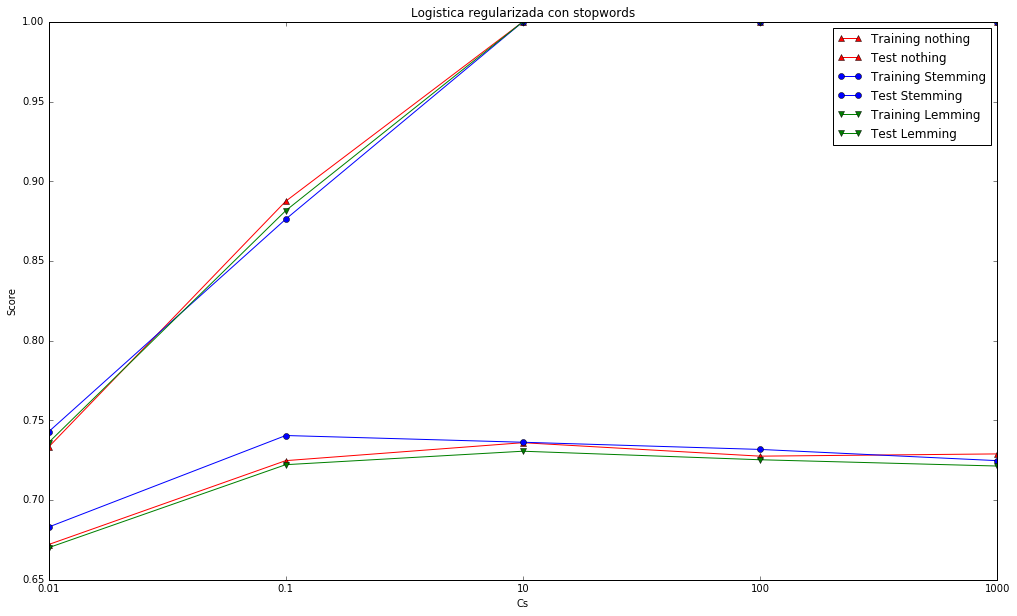

In [95]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
Cs, tr_acc, ts_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)


plt.figure(figsize=(17, 10))
plt.plot(range(0,5), tr_acc, c='r', marker='^', label='Training nothing')
plt.plot(range(0,5), ts_acc, c='r', marker='^', label='Test nothing')

plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
Cs, tr_acc, ts_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='b', marker='o',  label='Training Stemming')
plt.plot(range(0,5), ts_acc, c='b', marker='o', label='Test Stemming')
plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
Cs, tr_acc, ts_acc = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='g', marker='v', label='Training Lemming')
plt.plot(range(0,5), ts_acc, c='g',  marker='v', label='Test Lemming')

plt.xlabel("Cs")
plt.ylabel("Score")
plt.xticks(range(0,5),['0.01','0.1','10','100','1000'])
plt.title("Logistica regularizada con stopwords")
plt.legend()

![title](logi_no_stop.png)

![title](logi_si_stop.png)

## h)
 Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal y mida
el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la
7
exploración de diferentes valores del parámetro de regularización C. Discuta el significado y efecto
esperado de este parámetro. Utilice la función construida con los atributos extra´ıdos en el punto (d).
Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento t´ıpico. Determine
además, qu´ e representación obtiene un mejor resultado: si aquella obtenida v´ıa lematización o aquella
obtenida v´ıa stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice
las predicciones del modelo (explore las predicciones, as´ı como las probabilidades que el clasificador
asigna a cada clase).

In [89]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt, ver):
    Cs = [0.01,0.1,10,100,1000]
    if ver == 1:
        for C in Cs:
            print "El valor de C que se esta probando: %f"%C
            model = LinearSVC(C=C)
            model = model.fit(x, y)
            score_the_model(model,x,y,xt,yt,"SVM")
    else:
        tr_acc = []
        ts_acc = []
        
        for C in Cs:
            model = LinearSVC(C=C)
            model = model.fit(x, y)
            tr_acc.append(model.score(x,y))
            ts_acc.append(model.score(xt[:-1],yt[:-1]))
            
        return Cs, tr_acc, ts_acc 

In [90]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
do_SVM(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
do_SVM(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
do_SVM(features_train,labels_train,features_test,labels_test, 1)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.898143
Test Accuracy SVM: 0.719674
Confusion matrix: 
[[1319  484]
 [ 512 1239]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.73      0.73      1803
          -       0.72      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.992403
Test Accuracy SVM: 0.724458
Confusion matrix: 
[[1289  514]
 [ 465 1286]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.71      0.72      1803
          -       0.71      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.701379
Confusion matrix: 
[[1258  545]
 [ 516 1235]]
Detailed Analysis Testing Results ...
  

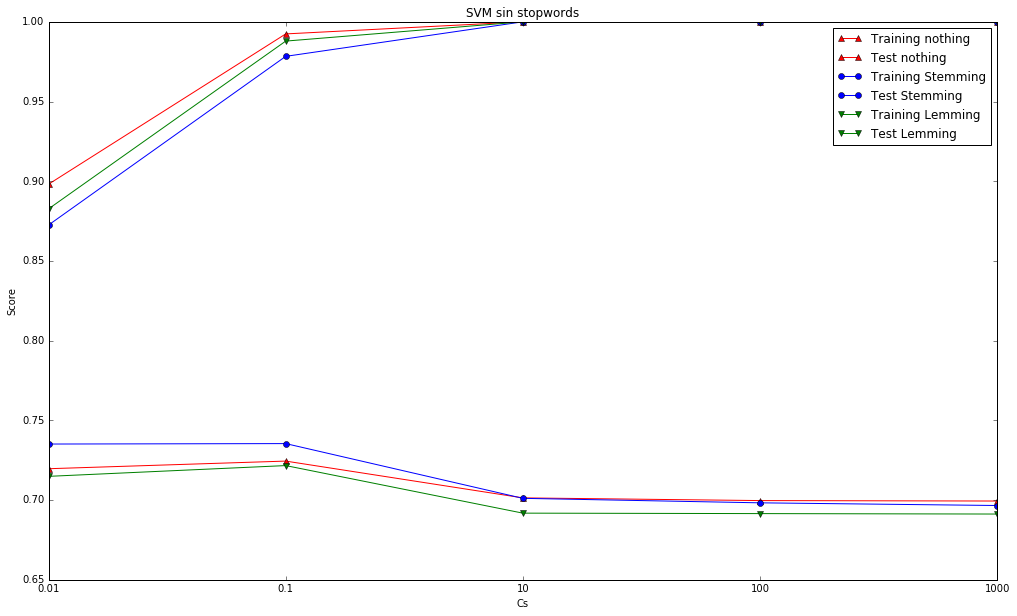

In [96]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 1)
Cs, tr_acc, ts_acc = do_SVM(features_train,labels_train,features_test,labels_test, 0)


plt.figure(figsize=(17, 10))
plt.plot(range(0,5), tr_acc, c='r', marker='^', label='Training nothing')
plt.plot(range(0,5), ts_acc, c='r', marker='^', label='Test nothing')

plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 1)
Cs, tr_acc, ts_acc = do_SVM(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='b', marker='o',  label='Training Stemming')
plt.plot(range(0,5), ts_acc, c='b', marker='o', label='Test Stemming')
plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 1)
Cs, tr_acc, ts_acc = do_SVM(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='g', marker='v', label='Training Lemming')
plt.plot(range(0,5), ts_acc, c='g',  marker='v', label='Test Lemming')

plt.xlabel("Cs")
plt.ylabel("Score")
plt.xticks(range(0,5),['0.01','0.1','10','100','1000'])
plt.title("SVM sin stopwords")
plt.legend()

In [151]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
do_SVM(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
do_SVM(features_train,labels_train,features_test,labels_test, 1)
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
do_SVM(features_train,labels_train,features_test,labels_test, 1)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.884918
Test Accuracy SVM: 0.721925
Confusion matrix: 
[[1291  512]
 [ 476 1275]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.72      1803
          -       0.71      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

El valor de C que se esta probando: 0.100000
Training Accuracy SVM: 0.990433
Test Accuracy SVM: 0.741627
Confusion matrix: 
[[1306  497]
 [ 421 1330]]
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.72      0.74      1803
          -       0.73      0.76      0.74      1751

avg / total       0.74      0.74      0.74      3554

El valor de C que se esta probando: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.719111
Confusion matrix: 
[[1264  539]
 [ 459 1292]]
Detailed Analysis Testing Results ...
  

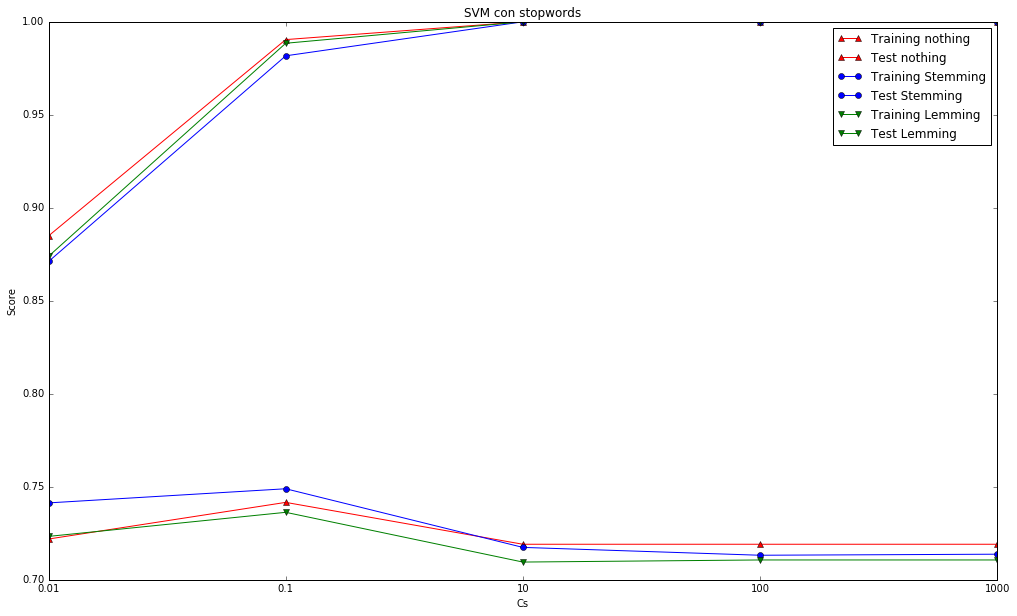

In [97]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(0, 0)
Cs, tr_acc, ts_acc = do_SVM(features_train,labels_train,features_test,labels_test, 0)


plt.figure(figsize=(17, 10))
plt.plot(range(0,5), tr_acc, c='r', marker='^', label='Training nothing')
plt.plot(range(0,5), ts_acc, c='r', marker='^', label='Test nothing')

plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
Cs, tr_acc, ts_acc = do_SVM(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='b', marker='o',  label='Training Stemming')
plt.plot(range(0,5), ts_acc, c='b', marker='o', label='Test Stemming')
plt.legend()

features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)
Cs, tr_acc, ts_acc = do_SVM(features_train,labels_train,features_test,labels_test, 0)

plt.plot(range(0,5), tr_acc, c='g', marker='v', label='Training Lemming')
plt.plot(range(0,5), ts_acc, c='g',  marker='v', label='Test Lemming')

plt.xlabel("Cs")
plt.ylabel("Score")
plt.xticks(range(0,5),['0.01','0.1','10','100','1000'])
plt.title("SVM con stopwords")
plt.legend()

In [163]:
from sklearn.calibration import CalibratedClassifierCV
#features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(2, 0)

#model = LinearSVC(C=0.1)
#clf = CalibratedClassifierCV(model)

#clf.fit(features_train,labels_train)


#test_pred = clf.predict_proba(features_test)
#spl = [50, 814, 248, 2301, 1526]
#for text, val, sentiment in zip(test_df.Text[spl], test_df.Sentiment[spl], test_pred[spl]):
#    print sentiment, val, text

![title](svc_no_stop.png)

![title](svc_si_stop.png)

## i)
 Construya un gráfico que permita comparar los resultados obtenidos por los diferentes metodos de
clasificación.

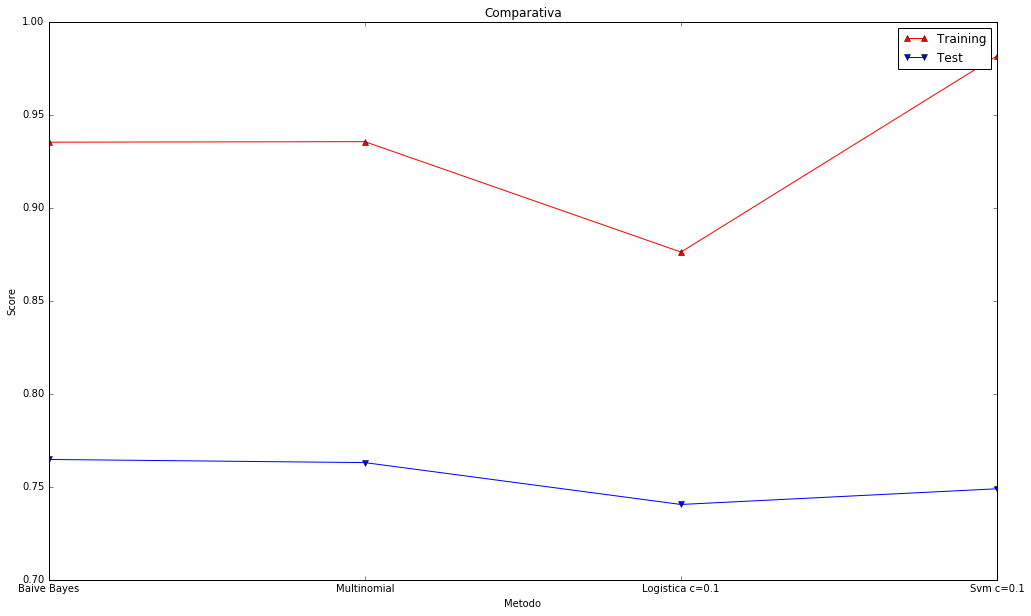

In [174]:
features_train, labels_train, features_test, labels_test, inpu_train, inpu_test = data(1, 0)
tr_acc = [1,1,1,1]
ts_acc = [1,1,1,1]

tr_acc[0], ts_acc[0] = do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test, 0)
tr_acc[1], ts_acc[1] = do_MULTINOMIAL(features_train,labels_train,features_test,labels_test, 0)
Cs, tr, ts = do_LOGIT(features_train,labels_train,features_test,labels_test, 0)
tr_acc[2] = tr[1]
ts_acc[2] = ts[1]
Cs, tr, ts = do_SVM(features_train,labels_train,features_test,labels_test, 0)
tr_acc[3] = tr[1]
ts_acc[3] = ts[1]

plt.figure(figsize=(17, 10))

plt.plot(range(0,4), tr_acc, c='r', marker='^', label='Training')
plt.plot(range(0,4), ts_acc, c='b', marker='v', label='Test')

plt.legend()
plt.xlabel("Metodo")
plt.ylabel("Score")
plt.xticks(range(0,4),['Baive Bayes','Multinomial','Logistica c=0.1','Svm c=0.1'])
plt.title("Comparativa")
plt.legend()

